In [ ]:
# Mount data drive
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/EMSE 6575/LogisticRegressionHomework'

Mounted at /data/


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
# Read the data - 
# Data is marketing campaign data for a bank where the goal is to predict whether the client will subscribe to a term deposit.
train = pd.read_excel(data_dir + '/train.xlsx', header=0)
test = pd.read_excel(data_dir + '/test.xlsx', header=0)
train['train_test'] = 'train'
test['train_test'] = 'test'
data = pd.concat([train, test]).reset_index()
print("Train: " + str(train.shape))
print("Test: " + str(test.shape))
print("Total: " + str(data.shape))
data.head()

Train: (891, 13)
Test: (418, 12)
Total: (1309, 14)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [ ]:
data.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
train_test        0
dtype: int64

In [ ]:
(data[['Pclass', 'Survived']]
    .groupby(['Pclass'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


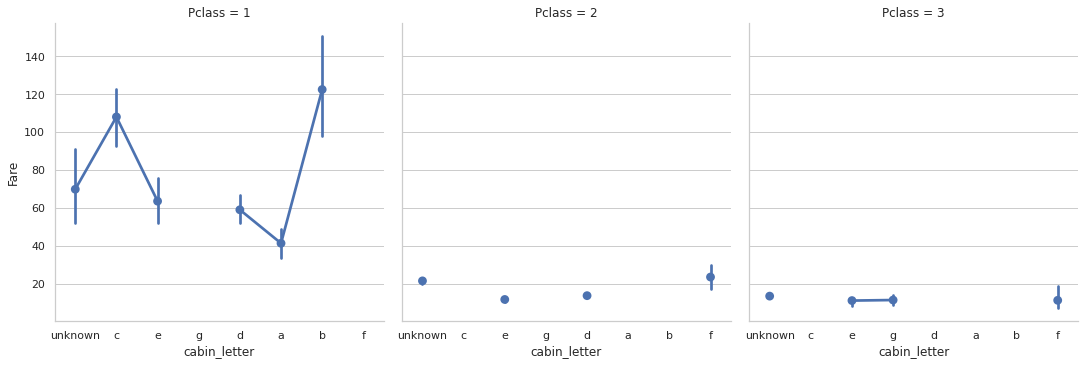

In [ ]:
data['Cabin'][data['Cabin'].isnull() == True] = " "

def parse_cabin_letter(txt):
  cabin_letter = "unknown"
  if 'a' in txt.lower():
    cabin_letter = 'a'
  if 'b' in txt.lower():
    cabin_letter = 'b'
  if 'c' in txt.lower():
    cabin_letter = 'c'
  if 'd' in txt.lower():
    cabin_letter = 'd'
  if 'e' in txt.lower():
    cabin_letter = 'e'
  if 'f' in txt.lower():
    cabin_letter = 'f'
  if 'g' in txt.lower():
    cabin_letter = 'g'
  return cabin_letter

data['cabin_letter'] = data['Cabin'].apply(lambda x: parse_cabin_letter(x)) 
data['cabin_letter'].value_counts()
sns.factorplot('cabin_letter','Fare', col = 'Pclass', data=data)
plt.show()

## Parse out additional information

Marital status

In [ ]:
import re
def parse_surname(txt):
  marital_status = "unknown"
  if 'mrs.' in txt.lower():
    marital_status = 'mrs'
  if 'mr.' in txt.lower():
     marital_status = 'mr'  
  if 'miss.' in txt.lower():
     marital_status = 'miss'  
  if 'master.' in txt.lower():
     marital_status = 'master'  
  return marital_status

data['surname'] = data['Name'].apply(lambda x: parse_surname(x)) 

died_mrs = len(data[(data['surname'] == 'mrs') & (data['Survived'] == 0) & (data['train_test'] == 'train')])
mrs = len(data[(data['surname'] == 'mrs') & (data['train_test'] == 'train')])
death_rate_mrs = died_mrs/mrs
print("Total Mrs. Surname: " + str(mrs) + "\n" + "Mrs. Death Rate: " + str(death_rate_mrs) + "\n")

died_mr = len(data[(data['surname'] == 'mr') & (data['Survived'] == 0) & (data['train_test'] == 'train')])
mr = len(data[(data['surname'] == 'mr') & (data['train_test'] == 'train')])
death_rate_mr = died_mr/mr
print("Total Mr. Surname: " + str(mr) + "\n" + "Mr. Death Rate: " + str(death_rate_mr) + "\n")

died_miss = len(data[(data['surname'] == 'miss') & (data['Survived'] == 0) & (data['train_test'] == 'train')])
miss = len(data[(data['surname'] == 'miss') & (data['train_test'] == 'train')])
death_rate_miss = died_miss/miss
print("Total Miss. Surname: " + str(miss) + "\n" + "Miss Death Rate: " + str(death_rate_miss) + "\n")

died_master = len(data[(data['surname'] == 'master') & (data['Survived'] == 0) & (data['train_test'] == 'train')])
master = len(data[(data['surname'] == 'master') & (data['train_test'] == 'train')])
death_rate_master = died_master/master
print("Total Master Surname: " + str(master) + "\n" + "Master Death Rate: " + str(death_rate_master))

Total Mrs. Surname: 125
Mrs. Death Rate: 0.208

Total Mr. Surname: 517
Mr. Death Rate: 0.8433268858800773

Total Miss. Surname: 182
Miss Death Rate: 0.3021978021978022

Total Master Surname: 40
Master Death Rate: 0.425


In [ ]:
died_male = len(data[(data['Sex'] == 'male') & (data['Survived'] == 0) & (data['train_test'] == 'train')])
male = len(data[(data['Sex'] == 'male') & (data['train_test'] == 'train')])
death_rate_male = died_male/male
print("Total Males: " + str(male) + "\n" + "Male Death Rate: " + str(death_rate_male) + "\n")

died_female = len(data[(data['Sex'] == 'female') & (data['Survived'] == 0) & (data['train_test'] == 'train')])
female = len(data[(data['Sex'] == 'female') & (data['train_test'] == 'train')])
death_rate_female = died_female/female
print("Total Females: " + str(female) + "\n" + "Female Death Rate: " + str(death_rate_female))

Total Males: 577
Male Death Rate: 0.8110918544194108

Total Females: 314
Female Death Rate: 0.25796178343949044


Family size

In [ ]:
data['family_size'] = data['SibSp'].astype(int) + data['Parch'].astype(int) + 1
# The Sage family apparently has 11 people on the cruise
# The father is Mr. John George Sage since he lists 9 children
# The mother is Msr. Annie Bullen Sage since she lists 9 children
# lots of the kids use a surname of Mr. and only one person has an age listed
data[['Name','family_size', 'SibSp', 'Parch', 'Age']][data['family_size'] == 11]

,Name,family_size,SibSp,Parch,Age
159,"Sage, Master. Thomas Henry",11,8,2,NaN
180,"Sage, Miss. Constance Gladys",11,8,2,NaN
201,"Sage, Mr. Frederick",11,8,2,NaN
324,"Sage, Mr. George John Jr",11,8,2,NaN
792,"Sage, Miss. Stella Anna",11,8,2,NaN
846,"Sage, Mr. Douglas Bullen",11,8,2,NaN
863,"Sage, Miss. Dorothy Edith ""Dolly""",11,8,2,NaN
1079,"Sage, Miss. Ada",11,8,2,NaN
1233,"Sage, Mr. John George",11,1,9,NaN
1251,"Sage, Master. William Henry",11,8,2,14.5


## Impute missing values

In [ ]:
data.groupby('surname')['Age'].mean()

surname
master      5.482642
miss       21.774238
mr         32.252151
mrs        36.994118
unknown    42.656250
Name: Age, dtype: float64

In [ ]:
print("Missing ages: " + str(sum(data['Age'].isnull())))
data['Age'] = data['Age'].astype(float)
data.loc[(data.Age.isnull())&(data.surname=='mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.surname=='mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.surname=='master'),'Age']=5
data.loc[(data.Age.isnull())&(data.surname=='miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.surname=='unknown'),'Age']=46
print("Missing ages: " + str(sum(data['Age'].isnull())))
#sns.catplot(x='Survived', y="Age", kind="box", dodge=False, height = 5, aspect = 1.5,data=data);

Missing ages: 263
Missing ages: 0


In [ ]:
data[['Name','family_size', 'SibSp', 'Parch', 'Age']][data['family_size'] == 11]

,Name,family_size,SibSp,Parch,Age
159,"Sage, Master. Thomas Henry",11,8,2,5.0
180,"Sage, Miss. Constance Gladys",11,8,2,22.0
201,"Sage, Mr. Frederick",11,8,2,33.0
324,"Sage, Mr. George John Jr",11,8,2,33.0
792,"Sage, Miss. Stella Anna",11,8,2,22.0
846,"Sage, Mr. Douglas Bullen",11,8,2,33.0
863,"Sage, Miss. Dorothy Edith ""Dolly""",11,8,2,22.0
1079,"Sage, Miss. Ada",11,8,2,22.0
1233,"Sage, Mr. John George",11,1,9,33.0
1251,"Sage, Master. William Henry",11,8,2,14.5


In [ ]:
print("Missing Embarked Values: " + str(sum(data['Embarked'].isnull())))
# replace with most common value since there are only 2 values missing
data['Embarked'].value_counts()
data['Embarked'].fillna("S", inplace=True)
print("Missing Embarked Values: " + str(sum(data['Embarked'].isnull())))

Missing Embarked Values: 2
Missing Embarked Values: 0


In [ ]:
print("Missing Fares: " + str(sum(data['Fare'].isnull())))
data['Fare'] = data['Fare'].astype(float)
data['Fare_median'] = data.groupby(['Pclass'])['Fare'].transform('median')
data['Fare'] = np.where(data['Fare'].isnull(), data['Fare_median'], data['Fare'])
print("Missing Fares: " + str(sum(data['Fare'].isnull())))

Missing Fares: 1
Missing Fares: 0


## Bin continuous variables into categories

In [ ]:
bins = [0, 15, 25, 35, 60, 81]  # binning
bin_names = ['child','young','adult','middle','senior'] # label tagging
data['Age_bin'] = pd.cut(data['Age'],
                          bins = bins,
                          labels=bin_names,
                          include_lowest = True)
data['Age_bin'].value_counts()

adult     457
young     378
middle    318
child     123
senior     33
Name: Age_bin, dtype: int64

In [ ]:
data['alone'] = False
data['alone'][data['family_size'] == 1] = True
data['alone'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


True     790
False    519
Name: alone, dtype: int64

In [ ]:
bins = [0, 8, 30, 100]  # binning
bin_names = ['economy','business','first_class'] # label tagging
data['fare_bin'] = pd.cut(data['Fare'],
                          bins = bins,
                          labels=bin_names,
                          include_lowest = True)
data['fare_bin'].value_counts()

business       606
economy        360
first_class    259
Name: fare_bin, dtype: int64

## One-hot encode categorical variables

In [ ]:
# One-hot encode the categorical variables 
cat_vars=['Age_bin', 'surname', 'Embarked', 'Sex', 'Pclass', 'alone', 'fare_bin']
for var in cat_vars:
  cat_list='var'+'_'+var
  cat_list = pd.get_dummies(data[var], prefix=var)
  data1=data.join(cat_list)
  data=data1

data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

array(['index', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'train_test', 'cabin_letter',
       'family_size', 'Fare_median', 'Age_bin_child', 'Age_bin_young',
       'Age_bin_adult', 'Age_bin_middle', 'Age_bin_senior',
       'surname_master', 'surname_miss', 'surname_mr', 'surname_mrs',
       'surname_unknown', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'alone_False', 'alone_True', 'fare_bin_economy',
       'fare_bin_business', 'fare_bin_first_class'], dtype=object)

## Scale numeric values

In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()

numeric_vars = ['family_size', 'Age', 'Fare']

# #only standardize numerical features
features=data_final[numeric_vars]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
temp=pd.DataFrame(features_standard,columns=numeric_vars)
#temp=pd.DataFrame(features,columns=numeric_vars)
temp.head()

,family_size,Age,Fare
0,0.073352,-0.605528,-0.503176
1,0.073352,0.605797,0.734809
2,-0.558346,-0.302696,-0.490126
3,0.073352,0.378674,0.383263
4,-0.558346,0.378674,-0.487709


In [ ]:
cat_data = data_final[['Survived', 'train_test', 'Age_bin_child', 'Pclass_1', 'Pclass_2', 'Pclass_3',
                      'Age_bin_young', 'Age_bin_adult', 'Age_bin_middle', 'Age_bin_senior',
                      'surname_master', 'surname_miss', 'surname_mr', 'surname_mrs', 
                      'surname_unknown', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
                       'alone_False', 'alone_True', 'fare_bin_economy', 'fare_bin_business', 'fare_bin_first_class']]
data_final_after_standardizing = pd.concat([cat_data.reset_index(drop=True), temp], axis=1)
data_final = data_final_after_standardizing
data_final.head()

,Survived,train_test,Age_bin_child,Pclass_1,Pclass_2,Pclass_3,Age_bin_young,Age_bin_adult,Age_bin_middle,Age_bin_senior,surname_master,surname_miss,surname_mr,surname_mrs,surname_unknown,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,alone_False,alone_True,fare_bin_economy,fare_bin_business,fare_bin_first_class,family_size,Age,Fare
0,0.0,train,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0.073352,-0.605528,-0.503176
1,1.0,train,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0.073352,0.605797,0.734809
2,1.0,train,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,-0.558346,-0.302696,-0.490126
3,1.0,train,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0.073352,0.378674,0.383263
4,0.0,train,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,-0.558346,0.378674,-0.487709


## Recursive Feature Elimination

In [ ]:
X_train = data_final[data_final['train_test'] == "train"]
X_train = X_train.loc[:, X_train.columns != 'Survived']
X_train = X_train.loc[:, X_train.columns != 'train_test']

y_train = data_final[data_final['train_test'] == "train"]
y_train = y_train.loc[:, y_train.columns == 'Survived']

In [ ]:
import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

data_final_vars=data_final.columns.values.tolist()
logreg = LogisticRegression()
rfe = RFE(logreg, 16)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

from itertools import compress
cols = list(compress(X_train.columns, rfe.support_))
X=X_train[cols]
y=y_train['Survived']

# Implement the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

[False  True False  True  True False False False  True  True  True  True
  True False False  True  True  True False  True False False  True  True
  True  True]
[ 6  1 10  1  1  7 11  4  1  1  1  1  1  8  9  1  1  1  3  1  2  5  1  1
  1  1]
Optimization terminated successfully.
         Current function value: 0.402754
         Iterations 19
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.395     
Dependent Variable:         Survived                AIC:                     747.7080  
Date:                       2021-02-12 01:16        BIC:                     819.5932  
No. Observations:           891                     Log-Likelihood:          -358.85   
Df Model:                   14                      LL-Null:                 -593.33   
Df Residuals:               876                     LLR p-value:             3.4984e-91
Converged:                  1.0000                  Scale:                   

In [ ]:
# remove_cols = ['Sex_male', 'surname_mr', 'surname_master', 'surname_unknown']
# new_cols = [x for x in cols if x not in remove_cols]
# X=X_train[new_cols]
# y=y_train['Survived']
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary2())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
X.columns

Index(['Pclass_1', 'Pclass_3', 'Age_bin_young', 'surname_master',
       'surname_miss', 'surname_mr', 'surname_mrs', 'surname_unknown',
       'Embarked_S', 'Sex_female', 'Sex_male', 'alone_True',
       'fare_bin_first_class', 'family_size', 'Age', 'Fare'],
      dtype='object')

In [ ]:
X_test = data_final[data_final['train_test'] == "test"]
X_test = X_test[cols].reset_index(drop = True)
#y_test = data_final[data_final['train_test'] == "test"]
#y_test = y_test.loc[:, y_test.columns == 'Survived']

In [ ]:
y_pred = logreg.predict(X_test)
submission1 = pd.DataFrame({"PassengerId": test['PassengerId'].tolist(),
                            "Survived": y_pred})
submission1.to_csv(data_dir + "/koban_submission1.csv")

# First submission was a hot mess inside a dumpster fire.  I ranked in the bottom 20% of submissions.  This time we will do model selection using the training data for test and train sets.

In [ ]:
X_train = data_final[data_final['train_test'] == "train"]
X_train = X_train.loc[:, X_train.columns != 'Survived']
X_train = X_train.loc[:, X_train.columns != 'train_test']

y_train = data_final[data_final['train_test'] == "train"]
y_train = y_train.loc[:, y_train.columns == 'Survived']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, 16)
rfe = rfe.fit(X_train2, y_train2.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

cols = list(compress(X_train.columns, rfe.support_))
X=X_train[cols]
y=y_train['Survived']

# Implement the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

[False  True False  True  True False False False  True  True  True  True
  True False False  True  True  True  True False  True False  True  True
  True False]
[10  1  8  1  1  9  4 11  1  1  1  1  1  7  6  1  1  1  1  5  1  3  1  1
  1  2]
Optimization terminated successfully.
         Current function value: 0.403995
         Iterations 20
                                    Results: Logit
Model:                      Logit                   Pseudo R-squared:        0.393     
Dependent Variable:         Survived                AIC:                     749.9195  
Date:                       2021-02-12 01:16        BIC:                     821.8046  
No. Observations:           891                     Log-Likelihood:          -359.96   
Df Model:                   14                      LL-Null:                 -593.33   
Df Residuals:               876                     LLR p-value:             1.0276e-90
Converged:                  1.0000                  Scale:                   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X_test2[cols])

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test2[cols], y_test2)))

cm = metrics.confusion_matrix(y_test2, y_pred)
true_pos = cm[1,1]
true_neg = cm[0,0]
false_pos = cm[0,1]
false_neg = cm[1,0]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print("When we check precision of our model against the test data set, " + str(len(y_test2)) + " passengers")
print("")
print("Precision - We predicted survival " + str(cm[1,1] + cm[0,1]) + " times and were correct " + str(cm[1,1]) + " times: " + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5])
print("Recall - We predicted " + str(cm[1,1]) + " out of the " + str(cm[1,1] + cm[1,0]) + " surviving passengers: " + str(recall)[0:5])
print("")
print("Our total accuracy was " + str((cm[0,0] + cm[1,1])/len(y_test2))[0:5])
print("Our F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

Accuracy of logistic regression classifier on test set: 0.83
When we check precision of our model against the test data set, 179 passengers

Precision - We predicted survival 70 times and were correct 54 times: 0.771
Recall - We predicted 54 out of the 69 surviving passengers: 0.782

Our total accuracy was 0.826
Our F1 score was 0.776


## Logistic Regression classifier still not performing, so we will try a Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
from numpy import std

cv = KFold(n_splits=10, random_state = 1, shuffle = False)
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion="gini")
features = vars
accuracy = cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv = cv)
accuracy = list(accuracy)
f1_scores = cross_val_score(rf, X_train, y_train, scoring = 'f1', cv = cv)
f1_scores = list(f1_scores)
precision_scores = cross_val_score(rf, X_train, y_train, scoring = 'precision', cv = cv)
precision_scores = list(precision_scores)
recall_scores = cross_val_score(rf, X_train, y_train, scoring = 'recall', cv = cv)
recall_scores = list(recall_scores)

print('accuracy score: ' + str(mean(accuracy))[0:5] + " +/- " + str(std(accuracy))[0:5])
print('f1 score: ' + str(mean(f1_scores))[0:5] + " +/- " + str(std(f1_scores))[0:5])
print('precision: ' + str(mean(precision_scores))[0:5] + " +/- " + str(std(precision_scores))[0:5])
print('recall: '+ str(mean(recall_scores))[0:5] + " +/- " + str(std(recall_scores))[0:5])

accuracy score: 0.799 +/- 0.041
f1 score: 0.737 +/- 0.053
precision: 0.756 +/- 0.067
recall: 0.715 +/- 0.084
